<a href="https://colab.research.google.com/github/turjo997/Pattern-Recognition/blob/main/Assignment_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.spatial
from collections import Counter
import seaborn 
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir1 = "/content/drive/MyDrive/Random Files/data_k_mean.txt"

In [4]:
df = pd.read_csv(dir1 , sep=' ',header = None)
#df = pd.read_csv(dir1)
df.columns = ['X1' , 'X2']
print(df)

           X1       X2
0    -7.87157 -4.86573
1    -4.76661 -6.87944
2    -6.67986 -5.83080
3    -8.93021 -4.15571
4    -7.91375 -4.22840
...       ...      ...
2995 -8.06037 -4.84080
2996  7.47328  0.37321
2997  6.91832 -0.32132
2998 -8.23828 -4.00405
2999 -5.75112 -5.99531

[3000 rows x 2 columns]


In [5]:
trainval = df.values

In [6]:
trainval[0]

array([-7.87157, -4.86573])

In [7]:
class1X1 = []
class1X2 = []

for i , j  in trainval:
  class1X1.append(i)
  class1X2.append(j)

In [8]:
class1X1 = np.array(class1X1)
class1X2 = np.array(class1X2)

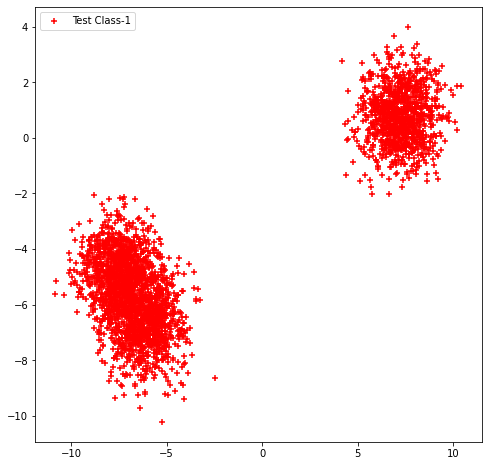

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(class1X1, class1X2, c='red', label = 'Test Class-1', marker = '+')
plt.legend()
plt.show()

In [10]:
def euclidean_distance(pt1 , pt2):
    distance = np.linalg.norm(pt1-pt2)
    return distance

In [11]:
def kmeans_cluster_centers_(a , b , c , d):
    array = ([[a,b] , [c,d]])
    print("The centeroid are: " , array)

In [12]:
len(df)

3000

In [13]:
def K_Means_Clustering():
  cen1 = [0.0 , 0.0]
  cen2 = [0.0 , 0.0]
  c1 = []
  c2 = []
  c1 = [df.X1[0] , df.X2[0]]
  c2 = [df.X1[1] , df.X2[1]]
  
  while (((cen1==c1)&(cen2==c2))==False):
    # print(cen1 , ' ' , cen2)
    cen1 = c1.copy()
    cen2 = c2.copy()
    x = []
    y = []
    z = []
    w = []
    new = []
    
    for i in range(len(df)):
       a= np.array([c1[0] , c1[1]])
       b = np.array([df.X1[i] , df.X2[i]])
       c = np.array([c2[0] , c2[1]])               
       Distance_From_C1 = euclidean_distance(a , b) 
       Distance_From_C2 = euclidean_distance(b , c)

       if Distance_From_C1 <= Distance_From_C2:
         new.append(1)
         x.append(df.X1[i])
         y.append(df.X2[i])
       else :
         new.append(0)
         z.append(df.X1[i])
         w.append(df.X2[i])

    sum = 0.0 
    sum1 = 0.0
            
    for k in range(len(x)):
      sum += x[k]
    for kk in range(len(y)):
      sum1 += y[kk]    
            
    res = sum/ len(x)
    res1 = sum1/ len(y)
          
    sum2 = 0.0 
    sum3 = 0.0
    for k in range(len(z)):
      sum2 += z[k]
    for kk in range(len(w)):
      sum3 += w[kk]
                
    res2 = sum2/ len(z)
    res3 = sum3/ len(w)
     
    c1[0] = res
    c1[1] = res1
    c2[0] = res2
    c2[1] = res3
  
    # print(c1 , ' ' ,  c2)
    # print(cen1 , ' ' , cen2)
    kmeans_cluster_centers_(c1[0] , c1[1] , c2[0] , c2[1])
  return new


new = K_Means_Clustering()    

The centeroid are:  [[-7.4929332493907435, -5.050452997562956], [1.5873027190503104, -2.511280096099487]]
The centeroid are:  [[-6.8170897349999935, -5.720846625000015], [7.218317149999998, 0.7821311200000001]]
The centeroid are:  [[-6.8170897349999935, -5.720846625000015], [7.218317149999998, 0.7821311200000001]]


In [14]:
df.insert(len(df.columns), 'colC' , new) 

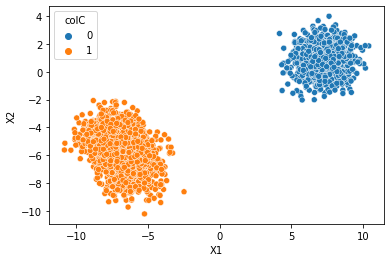

In [15]:
df['colC'].value_counts()
seaborn.scatterplot(x = 'X1' , y = 'X2' , hue = 'colC', data = df)

In [17]:
import io
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['data_k_mean.txt'] ), 
              sep=" " ,  header = None, dtype = 'Float64')

Saving data_k_mean.txt to data_k_mean (1).txt


In [18]:
trainval = train_data.values

In [19]:
train_data=np.array(train_data)

In [20]:
k=int(input("Enter k:"))
random.seed(10)
centroid=[]
sz=train_data[:,0].size
#PICKING k RANDOM CENTROID
#PICKING k RANDOM CENTROIDS
for x in range(k):
  pos=random.randint(0, sz-1)
  centroid.append([train_data[pos][0],train_data[pos][1]])

old_cluster=[]
new_cluster=[]
iter=1

# K MEANS CLUSTERING ALGORITHM
while 1:
  for i in range(sz):
    current_point=[train_data[i][0],train_data[i][1]]
    distances=[]
    # MEASURING DISTANCES FOR EACH POINT FROM K CENTROIDS
    for x in range(k):
      distances.append(math.sqrt(math.pow((centroid[x][0]-current_point[0]),2)+math.pow((centroid[x][1]-current_point[1]),2)))
    new_cluster.append(distances.index(min(distances)))

  # CHECKING TO SEE IF THE OLD AND NEW CLUSTERS MATCH; IF SO, BREAK
  if iter>1:
    old=set(old_cluster)
    new=set(new_cluster)
    if old==new:
      break

  # OLD != NEW, SO NOW WE UPDATE THE K CENTROID VALUES
  for x in range(k):
    # TAKING INDICES OF ALL ELEMENTS OF x'th CLUSTER
    l=[i for i,val in enumerate(new_cluster) if val==x]

    centroid_update=[0,0]
    # CALCULATING MEAN VALUE OF THE CLUSTER x
    for m in l:
      centroid_update[0]=centroid_update[0]+train_data[m][0]
      centroid_update[1]=centroid_update[1]+train_data[m][1]
    centroid[x][0]=centroid_update[0]/len(l)
    centroid[x][1]=centroid_update[1]/len(l)

  old_cluster=[]
  old_cluster=new_cluster
  new_cluster=[]
  iter=iter+1

Enter k:2


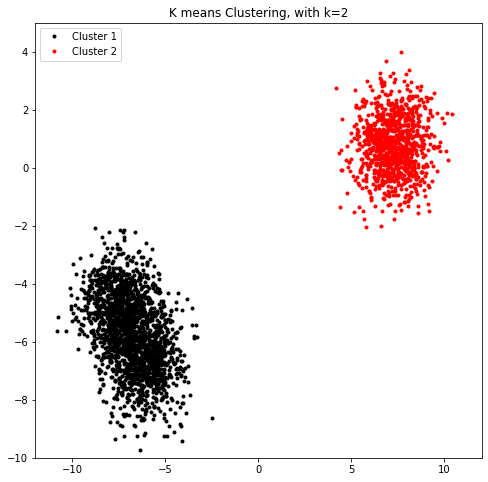

In [21]:
# PLOTTING CLUSTERS WITH SEPARATE COLORS
plt.figure(figsize=(8,8))
colours=['k.','r.','b.','g.','c.','m.','y.']
for x in range(k):
    l=[i for i,val in enumerate(old_cluster) if val==x]
    temp=[]
    for m in l:
      temp.append([train_data[m][0],train_data[m][1]])
    temp=np.array(temp)
    labl='Cluster '+str(x+1)
    plt.plot(temp[:,0],temp[:,1],colours[x%7],label=labl)
    
plt.legend()
plt.title('K means Clustering, with k='+str(k))
plt.xlim([-12,12])
plt.ylim([-10,5])  
plt.show()